In [1]:
## STEP 1: Load the data
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

#1. Get all CSV file paths from a folder
csv_files = glob.glob("*.csv")

#2. Create a dictionary of DataFrames
dataframes = {file: pd.read_csv(file) for file in csv_files}

#3. Display the first few rows of each DataFrame
for file, df in dataframes.items():
    print(f"\n--- {file} ---")
    print(df.head())


--- customers.csv ---
   customer_id first_name last_name  age state  income registration_date  \
0            1       John     Smith   34    CA   75000        2022-01-15   
1            2      Sarah   Johnson   28    NY   82000        2022-01-22   
2            3    Michael     Brown   45    TX   95000        2022-02-03   
3            4      Emily     Davis   31    FL   68000        2022-02-14   
4            5      David    Wilson   52    IL  110000        2022-02-28   

                     email  
0     john.smith@email.com  
1  sarah.johnson@email.com  
2  michael.brown@email.com  
3    emily.davis@email.com  
4   david.wilson@email.com  

--- products.csv ---
   product_id                   product_name           category  price  \
0           1  Wireless Bluetooth Headphones        Electronics  79.99   
1           2         Organic Cotton T-Shirt           Clothing  24.99   
2           3   Stainless Steel Water Bottle      Home & Garden  19.99   
3           4          Leath

In [2]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')

print(f"{len(customers)} customers")
print(f"{len(products)} products") 
print(f"{len(sales)} sales transactions")

100 customers
60 products
150 sales transactions


In [3]:
# Convert string dates to datetime objects so we can extract day names, months,
customers['registration_date'] = pd.to_datetime(customers['registration_date'])
products['launch_date'] = pd.to_datetime(products['launch_date'])
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])

print(sales['transaction_date'])
print(customers['registration_date'])
print(products['launch_date'])

0     2022-02-10 14:30:00
1     2022-02-15 10:15:00
2     2022-02-20 16:45:00
3     2022-02-25 11:20:00
4     2022-03-01 13:10:00
              ...        
145   2024-02-15 15:20:00
146   2024-02-20 11:30:00
147   2024-02-25 13:45:00
148   2024-03-01 16:15:00
149   2024-03-05 10:30:00
Name: transaction_date, Length: 150, dtype: datetime64[ns]
0    2022-01-15
1    2022-01-22
2    2022-02-03
3    2022-02-14
4    2022-02-28
        ...    
95   2023-12-08
96   2023-12-15
97   2023-12-22
98   2023-12-29
99   2024-01-05
Name: registration_date, Length: 100, dtype: datetime64[ns]
0    2021-03-15
1    2021-04-20
2    2021-05-10
3    2021-06-01
4    2021-06-15
5    2021-07-08
6    2021-07-22
7    2021-08-05
8    2021-08-18
9    2021-09-02
10   2021-09-16
11   2021-10-01
12   2021-10-15
13   2021-11-01
14   2021-11-12
15   2021-11-28
16   2021-12-10
17   2021-12-22
18   2022-01-08
19   2022-01-20
20   2022-02-03
21   2022-02-17
22   2022-03-01
23   2022-03-15
24   2022-03-28
25   2022-04-10
26 

In [4]:
# STEP 3: Extract useful information from dates
# Analyze patterns by day of the week, so extract day names
sales['year'] = sales['transaction_date'].dt.year
sales['month'] = sales['transaction_date'].dt.month
sales['day_of_week'] = sales['transaction_date'].dt.dayofweek
sales['day_name'] = sales['transaction_date'].dt.day_name()

print(sales['year'])
print(sales['month'])
print(sales['day_of_week'])
print(sales['day_name'])

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
145    2024
146    2024
147    2024
148    2024
149    2024
Name: year, Length: 150, dtype: int32
0      2
1      2
2      2
3      2
4      3
      ..
145    2
146    2
147    2
148    3
149    3
Name: month, Length: 150, dtype: int32
0      3
1      1
2      6
3      4
4      1
      ..
145    3
146    1
147    6
148    4
149    1
Name: day_of_week, Length: 150, dtype: int32
0      Thursday
1       Tuesday
2        Sunday
3        Friday
4       Tuesday
         ...   
145    Thursday
146     Tuesday
147      Sunday
148      Friday
149     Tuesday
Name: day_name, Length: 150, dtype: object


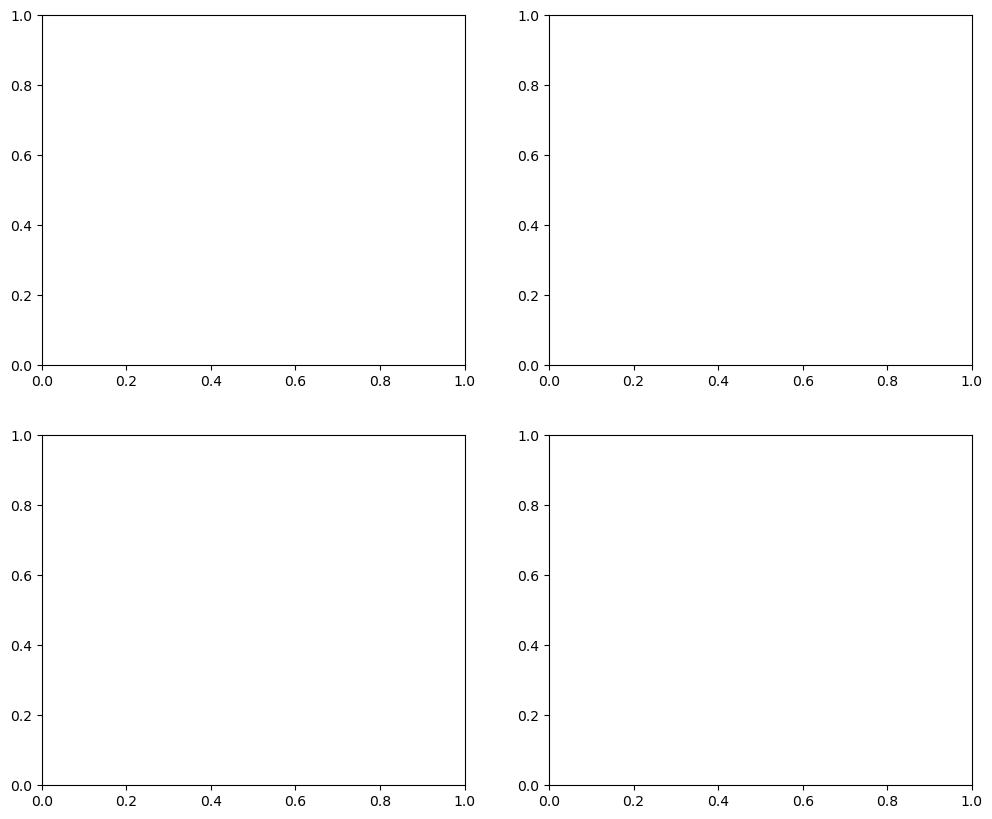

In [5]:
# Part 1: Executive Dashboard Creation
# Create a 2x2 subplot layout with four different chart types. Follow the manual subplot approach from the lesson.
# Step 1: Set up the grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

In [6]:
# Chart 1 Data: Revenue by product category
# Combine sales data with product category information
# Use merge() to join sales with products, then group by category and sum revenue
sales_with_category = sales.merge(products[['product_id', 'category']], on='product_id')
category_revenue = sales_with_category.groupby('category')['total_amount'].sum().sort_values(ascending=False)

# Chart 1: Revenue by Product Category
# Top Left (ax1): horizontal bar chart showing total revenue for each product category

sns.barplot(x=category_revenue.values, y=category_revenue.index, ax=ax1, palette='Greens_r', legend=False)
ax1.set_title('Top Product Categories by Total Revenue', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total Revenue ($)', fontsize=12)
ax1.set_ylabel('Product Category', fontsize=12)

/var/folders/8l/1vxtrpmn1c519qx87qb4sdn40000gn/T/ipykernel_77419/2300447986.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, ax=ax1, palette='Greens_r', legend=False)


Text(4.444444444444452, 0.5, 'Product Category')

In [7]:
# Chart 2 Data: Customer count by state  
# Count how many customers are in each state
state_customer_counts = customers['state'].value_counts()

# Top Right (ax2): a horizontal bar chart showing customer counts by state

sns.barplot(x=state_customer_counts.values, y=state_customer_counts.index, ax=ax2)
ax2.set_title("Customer Distribution by State",fontsize=14, fontweight='bold')
ax2.set_xlabel("Customer Count", fontsize=12)
ax2.set_ylabel("State", fontsize=12) 

Text(511.7171717171717, 0.5, 'State')

In [8]:
# Chart 3 Data: Daily transaction patterns
# Calculate average transaction amount for each day of the week
# Define the order of days so our chart shows Monday through Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_amount = sales.groupby('day_name')['total_amount'].mean().reindex(day_order)

# Fill any missing days with 0 (in case no transactions happened on certain days)
daily_avg_amount = daily_avg_amount.fillna(0)

# Bottom left line chart showing average transaction amounts by day of the week
ax3.plot(range(len(daily_avg_amount)), daily_avg_amount.values, marker='o', linewidth=2, markersize=6)
ax3.set_title("Daily Transaction Patterns",fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(day_order)))
ax3.set_xticklabels(day_order, fontsize=12)

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

<Figure size 640x480 with 0 Axes>

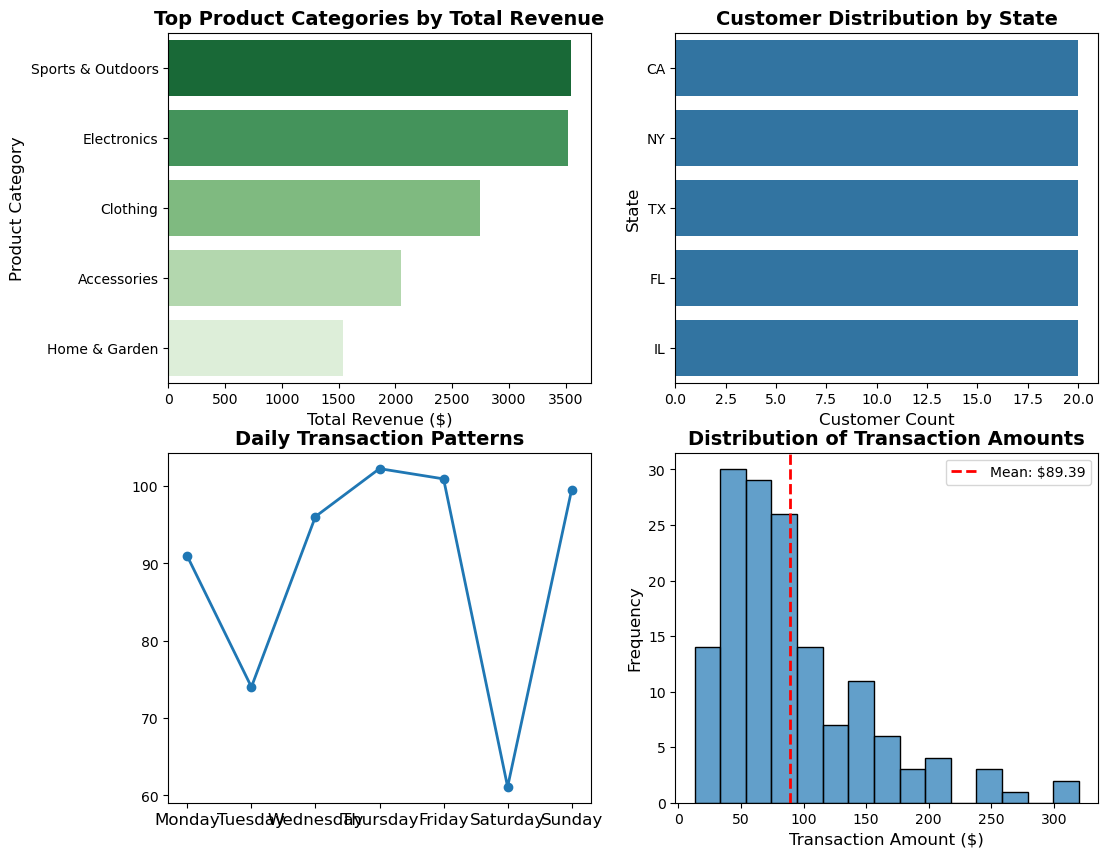

In [9]:
# Chart 4 Data: Transaction amounts for distribution analysis
# We'll use this to create a histogram showing the spread of transaction values
transaction_amounts = sales['total_amount']
mean_amount = transaction_amounts.mean() 

sns.histplot(transaction_amounts, bins=15, ax=ax4, alpha=0.7)
ax4.set_title('Distribution of Transaction Amounts', fontsize=14, fontweight='bold')
ax4.set_xlabel('Transaction Amount ($)', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.axvline(mean_amount, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_amount:.2f}')
ax4.legend()

plt.tight_layout()
plt.show()
fig